In [34]:
from sympy import *

In [1]:
import matplotlib.pyplot as plt
import numpy as np

In [2]:
from tqdm import tnrange, tqdm_notebook

In [35]:
eps, l, k, lambd, n, r, t = symbols('epsilon l k lambda n r t')

## ААААААА за что

In [222]:
test = Matrix(2,2, lambda i,j : i+j)
test

Matrix([
[0, 1],
[1, 2]])

In [223]:
test**2

Matrix([
[1, 2],
[2, 5]])

In [224]:
np.array(test, dtype=np.float64)**2

array([[0., 1.],
       [1., 4.]])

In [141]:
M = Matrix([[cos(k*l), I/sqrt(eps)*sin(k*l)],[I*sqrt(eps)*sin(k*l), cos(k*l)]])

In [142]:
M

Matrix([
[                cos(k*l), I*sin(k*l)/sqrt(epsilon)],
[I*sqrt(epsilon)*sin(k*l),                 cos(k*l)]])

In [42]:
def get_r_t(T):
    t_ = 2/(T[0,0]+T[1,1] - (T[1,0]+T[0,1]))
    r_ = (T[1,1] - T[0,0] + (T[1,0] - T[0,1]))/(T[0,0]+T[1,1] - (T[1,0]+T[0,1]))
    return (r_,t_)

In [144]:
k_eps = 2*pi/lambd *sqrt(eps)

In [145]:
eps_1 = 4 + I/20
l_1 = 100 #nm
eps_2 = 16 + I/10
l_2 = 50 #nm

In [146]:
M_1 = M.subs(k, k_eps).subs(eps, eps_1).subs(l, l_1)
M_2 = M.subs(k, k_eps).subs(eps, eps_2).subs(l, l_2)

In [43]:
T_2_1 = M_2 @ M_1
T_1_2 = M_1 @ M_2

In [62]:
r_2_1, t_2_1 = get_r_t(T_2_1)
r_1_2, t_1_2 = get_r_t(T_1_2)

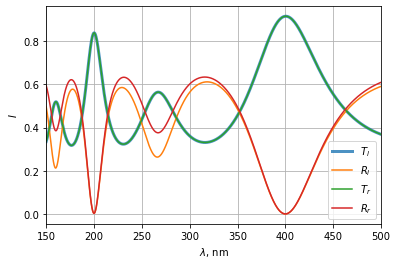

In [63]:
Lambda = np.linspace(150, 500, 2000)
plt.figure()
plt.plot(Lambda, lambdify(lambd, abs(t_2_1)**2)(Lambda), label=r'$T_l$', lw=3, alpha=0.8)
plt.plot(Lambda, lambdify(lambd, abs(r_2_1)**2)(Lambda),  label=r'$R_l$')
#
plt.plot(Lambda, lambdify(lambd, abs(t_1_2)**2)(Lambda), label=r'$T_r$')
plt.plot(Lambda, lambdify(lambd, abs(r_1_2)**2)(Lambda),  label=r'$R_r$')
#
plt.grid()
plt.legend()
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$I$')
plt.xlim((150, 500))
plt.savefig('Shishkin_1_A.pdf')


## B

In [149]:
T = (M_2 @ M_1)
for i in range(9):
    print(i)
    T = (M_2 @ M_1) @ T
#T = simplify(T)
r,t = get_r_t(T)

0
1
2
3
4
5
6
7
8


In [155]:
def get_T_R(lm):
    T_ = np.array((M_2 @ M_1).subs({lambd:lm}), dtype=np.complex128)
    T = T_
    for i in range(9):
        T = T_ @ T
#T = simplify(T)
    r_,t_ = get_r_t(T)
    return (np.abs(r_)**2, np.abs(t_)**2)

get_Tr_R = np.vectorize(get_T_R)

<IPython.core.display.Javascript object>


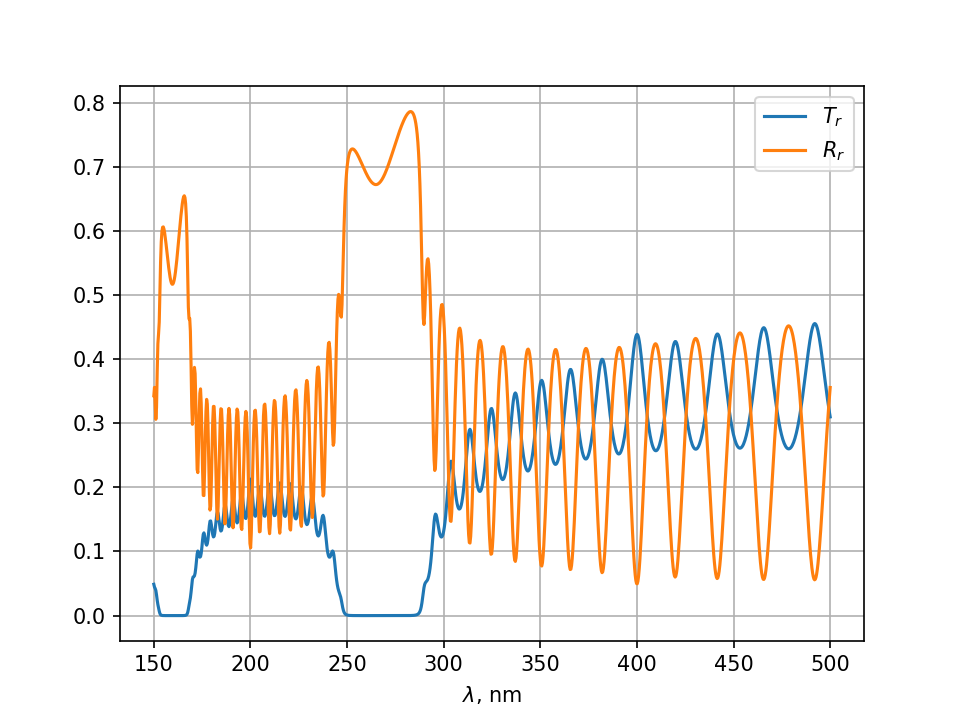

Text(0.5, 0, '$\\lambda$, nm')

In [158]:
Lambda = np.linspace(150, 500, 1000)
plt.figure()
R, Tr = get_Tr_R(Lambda)
plt.plot(Lambda, Tr, label=r'$T_r$')
plt.plot(Lambda, R,  label=r'$R_r$')
#
plt.grid()
plt.legend()
plt.xlabel(r'$\lambda$, nm')

In [3]:
hbarc =197.33 * 1e6 * 1e-15 *1e9  #197.33 MeV fm
W = np.linspace(1,2.1, 2000) # eV
Lambda = 2*np.pi/W * hbarc

<IPython.core.display.Javascript object>


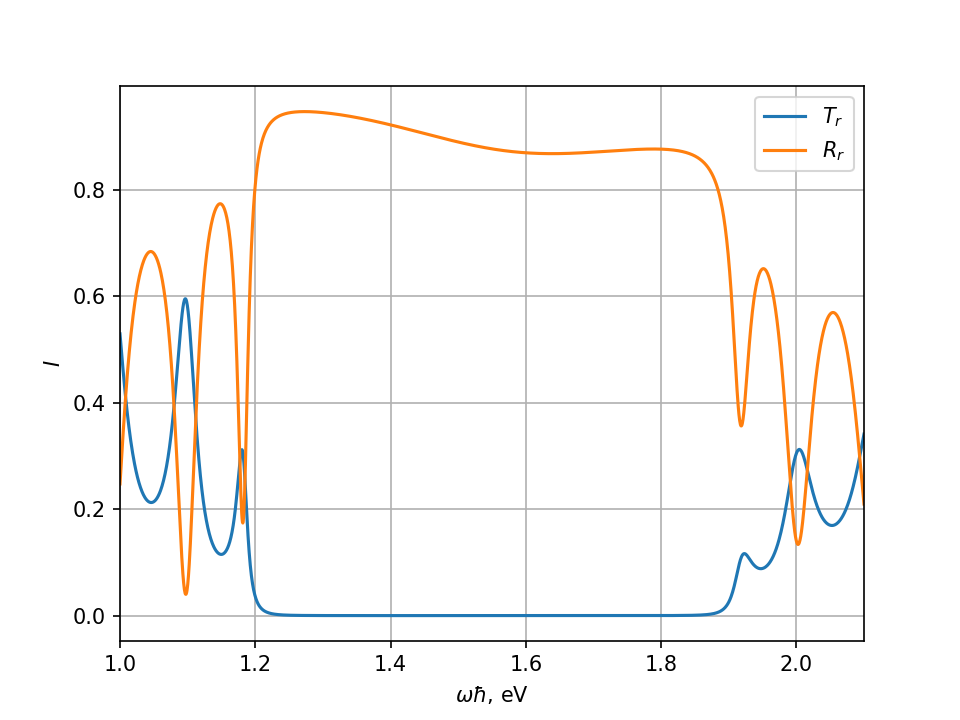

In [161]:
plt.figure()

#R, Tr = get_Tr_R(Lambda)


plt.plot(W, Tr, label=r'$T_r$')
plt.plot(W, R,  label=r'$R_r$')
#
plt.grid()
plt.legend()
plt.xlabel(r'$\omega\hbar$, eV')
plt.ylabel(r'$I$')
plt.xlim((1, 2.1))
plt.savefig('Shishkin_1_B.pdf')

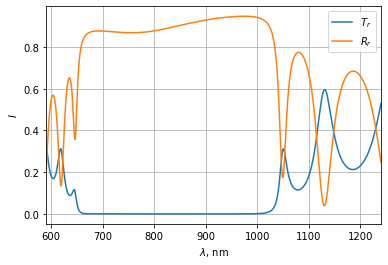

In [67]:
plt.figure()

plt.plot(Lambda, lambdify(lambd, abs(t)**2)(Lambda), label=r'$T_r$')
plt.plot(Lambda, lambdify(lambd, abs(r)**2)(Lambda),  label=r'$R_r$')
#
plt.grid()
plt.legend()
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$I$')
plt.xlim((Lambda[-1], Lambda[0]))
plt.savefig('Shishkin_1_B_lambda.pdf')

# Day 2

## A

In [164]:
M = Matrix([[cos(k*l), I/n*sin(k*l)],[I*n*sin(k*l), cos(k*l)]])

In [165]:
M

Matrix([
[    cos(k*l), I*sin(k*l)/n],
[I*n*sin(k*l),     cos(k*l)]])

In [166]:
k_n = 2*pi/lambd *n

In [172]:
n_1 = 2.05
l_1 = 90 #nm
n_2 = 1.45
l_2 = 125 #nm

n_c = 1
l_c = 275 # nm

In [173]:
M_1 = M.subs(k, k_n).subs(n, n_1).subs(l, l_1).evalf(n=30)
M_2 = M.subs(k, k_n).subs(n, n_2).subs(l, l_2).evalf(n=30)
M_c = M.subs(k, k_n).subs(n, n_c).subs(l, l_c).evalf(n=30)

In [174]:
Lambda = np.linspace(500, 900, 1000)
R = np.zeros_like(Lambda)
T = np.zeros_like(Lambda)
for i in tqdm_notebook(range(len(Lambda))):
    lm = Lambda[i]
    M_1_i = np.array(M_1.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_2_i = np.array(M_2.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_c_i = np.array(M_c.evalf(subs={lambd:lm}), dtype=np.complex128)
    T_i = M_1_i @ np.linalg.matrix_power(M_2_i @ M_1_i,7) @ M_c_i @ M_1_i @ np.linalg.matrix_power(M_2_i @ M_1_i,7)
    r_i,t_i = get_r_t(T_i)
    R[i] = np.abs(r_i)**2
    T[i] = np.abs(t_i)**2

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/3378157338.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(Lambda))):


  0%|          | 0/1000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


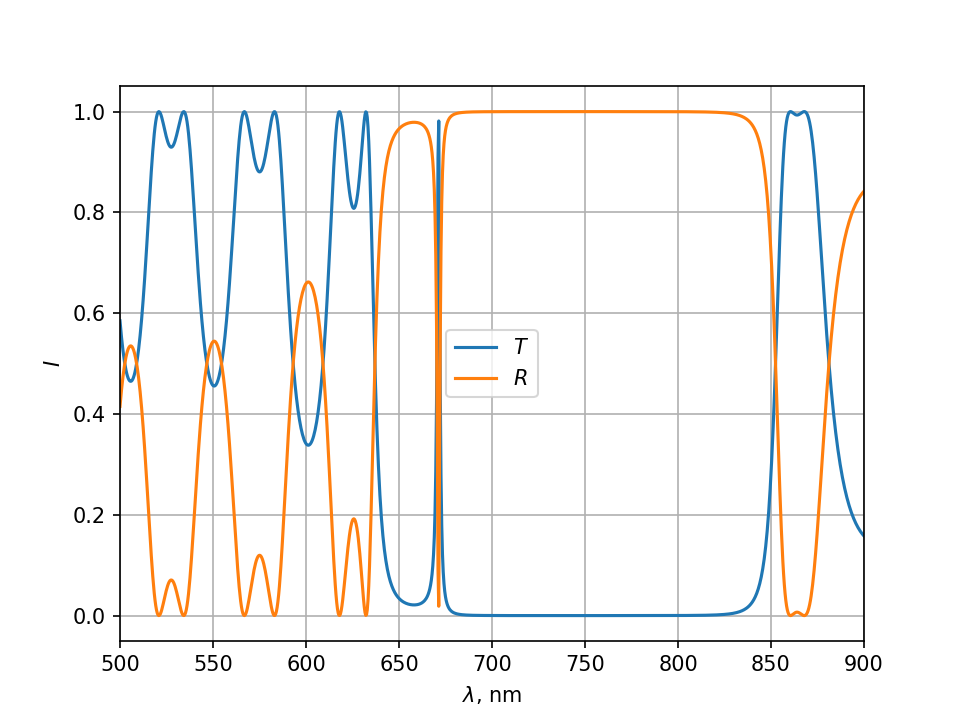

In [175]:
plt.figure()
plt.plot(Lambda, T, label=r'$T$')
plt.plot(Lambda, R,  label=r'$R$')
#
plt.grid()
plt.legend()
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$I$')
plt.xlim((500, 900))
plt.savefig('Shishkin_2_B.pdf')


# Corrected A

In [176]:
n_1 = 2.05
l_1 = 100 #nm
n_2 = 1.45
l_2 = n_1*l_1/n_2 #nm

n_c = 1
l_c = 2 *n_1*l_1  # nm

In [177]:
M_1 = M.subs(k, k_n).subs(n, n_1).subs(l, l_1).evalf(n=30)
M_2 = M.subs(k, k_n).subs(n, n_2).subs(l, l_2).evalf(n=30)
M_c = M.subs(k, k_n).subs(n, n_c).subs(l, l_c).evalf(n=30)

In [178]:
Lambda = np.linspace(600, 1000, 1000)
R = np.zeros_like(Lambda)
T = np.zeros_like(Lambda)
for i in tqdm_notebook(range(len(Lambda))):
    lm = Lambda[i]
    M_1_i = np.array(M_1.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_2_i = np.array(M_2.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_c_i = np.array(M_c.evalf(subs={lambd:lm}), dtype=np.complex128)
    T_i = M_1_i @ np.linalg.matrix_power(M_2_i @ M_1_i,7) @ M_c_i @ M_1_i @ np.linalg.matrix_power(M_2_i @ M_1_i,7)
    r_i,t_i = get_r_t(T_i)
    R[i] = np.abs(r_i)**2
    T[i] = np.abs(t_i)**2

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/1113745593.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(Lambda))):


  0%|          | 0/1000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


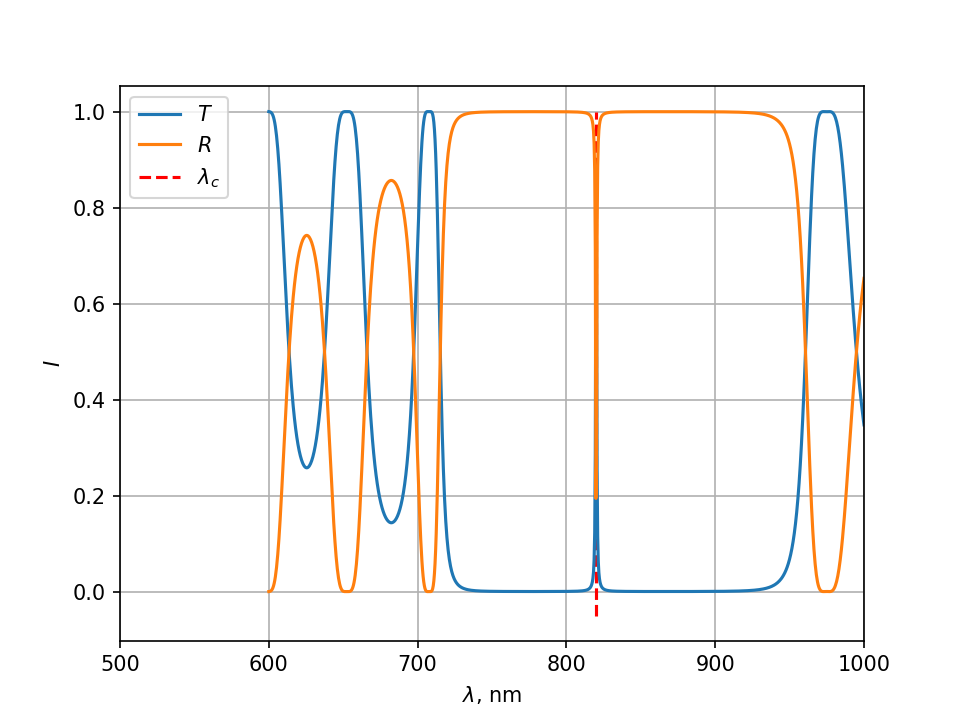

In [179]:
%matplotlib notebook
plt.figure()
plt.plot(Lambda, T, label=r'$T$')
plt.plot(Lambda, R,  label=r'$R$')
plt.vlines(l_c*2, -0.05,1,colors='red', linestyles='--', label=r'$\lambda_c$' )
#
plt.grid()
plt.legend()
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$I$')
plt.xlim((500, 1000))
plt.savefig('Shishkin_2_B_corrected.pdf')


## Corrected corrected A

In [367]:
n_1 = 2.05
l_0 = 720 #nm

l_1 = l_0/n_1/4 #nm

n_2 = 1.45
l_2 =  l_0/n_2/4#nm

n_c = 1
l_c = l_0/2  # nm

In [368]:
M_1 = M.subs(k, k_n).subs(n, n_1).subs(l, l_1).evalf(n=30)
M_2 = M.subs(k, k_n).subs(n, n_2).subs(l, l_2).evalf(n=30)
M_c = M.subs(k, k_n).subs(n, n_c).subs(l, l_c).evalf(n=30)

In [370]:
Lambda = np.linspace(600, 900, 1000)
R = np.zeros_like(Lambda)
T = np.zeros_like(Lambda)
for i in tqdm_notebook(range(len(Lambda))):
    lm = Lambda[i]
    M_1_i = np.array(M_1.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_2_i = np.array(M_2.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_c_i = np.array(M_c.evalf(subs={lambd:lm}), dtype=np.complex128)
    T_i = M_1_i @ np.linalg.matrix_power(M_2_i @ M_1_i,7) @ M_c_i @ M_1_i @ np.linalg.matrix_power(M_2_i @ M_1_i,7)
    r_i,t_i = get_r_t(T_i)
    R[i] = np.abs(r_i)**2
    T[i] = np.abs(t_i)**2

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/1697947656.py:4: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(Lambda))):


  0%|          | 0/1000 [00:00<?, ?it/s]

TypeError: can't convert expression to float

<IPython.core.display.Javascript object>


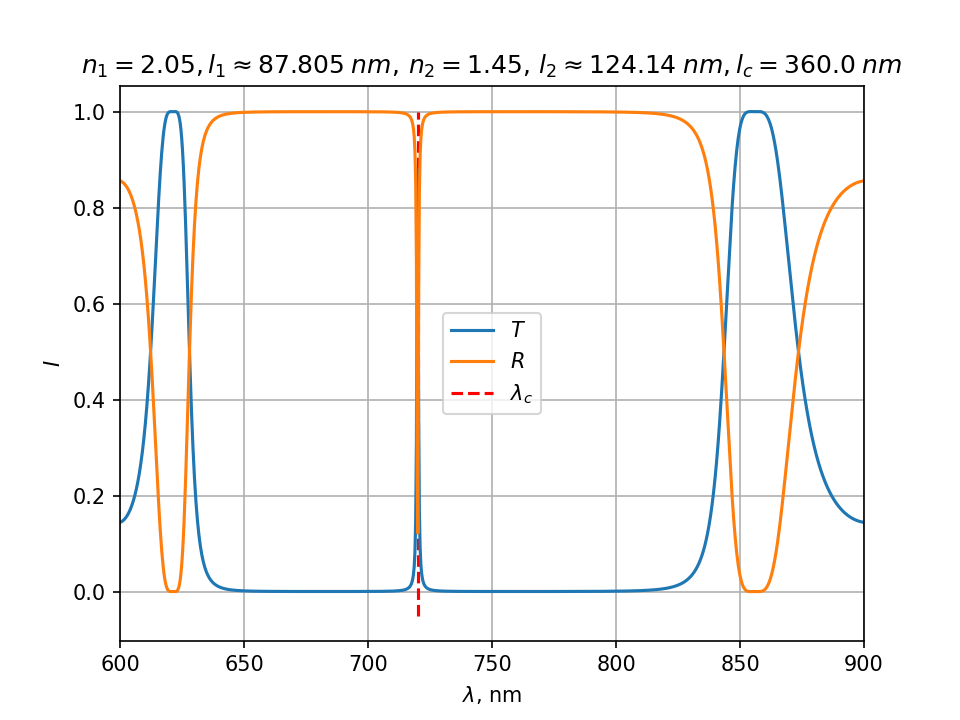

In [186]:
%matplotlib notebook
plt.figure()
plt.plot(Lambda, T, label=r'$T$')
plt.plot(Lambda, R,  label=r'$R$')
plt.title(fr'$n_1={n_1}, l_1 \approx {l_1:.5}\; nm, \, n_2={n_2},\,l_2 \approx {l_2:.5}\; nm , l_c = {l_c}\; nm$')
plt.vlines(l_c*2, -0.05,1,colors='red', linestyles='--', label=r'$\lambda_c$' )
#
plt.grid()
plt.legend()
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$I$')
plt.xlim((Lambda[0], Lambda[-1]))
plt.savefig('Shishkin_2_B_corrected_corrected.pdf')


### Find symmetric matrix transition

In [188]:
Matr = zeros(4,4)
Matr[0,0] = 1+r
Matr[0,1] = 1-r
Matr[1,2] = 1+r
Matr[1,3] = 1-r
Matr[2,0] = t
Matr[2,1] = -t
Matr[3,2] = t
Matr[3,3] = -t
rs = Matrix([t,t,1+r,r-1])

In [189]:
Matr

Matrix([
[r + 1, 1 - r,     0,     0],
[    0,     0, r + 1, 1 - r],
[    t,    -t,     0,     0],
[    0,     0,     t,    -t]])

In [190]:
rs

Matrix([
[    t],
[    t],
[r + 1],
[r - 1]])

In [191]:
T = (Matr.inv(method = 'LU') @ rs).reshape(2,2)

In [192]:
simplify(T)

Matrix([
[(-r**2 + t**2 + 1)/(2*t),   t/2 - (r + 1)**2/(2*t)],
[  t/2 - (r - 1)**2/(2*t), (-r**2 + t**2 + 1)/(2*t)]])

In [193]:
T_qw = simplify(T.subs(t, r+1))

In [194]:
T_qw

Matrix([
[          1, 0],
[2*r/(r + 1), 1]])

In [144]:
simplify(T @ Matrix([1+r, 1-r]))

Matrix([
[t],
[t]])

In [145]:
simplify(T @ Matrix([t, -t]))

Matrix([
[r + 1],
[r - 1]])

In [96]:
T_qw

Matrix([
[          1, 0],
[2*r/(r + 1), 1]])

## With QW

In [167]:
n_1 = 2.05
l_0 = 720 #nm

l_1 = l_0/n_1/4 #nm

n_2 = 1.45
l_2 =  l_0/n_2/4#nm

n_c = 1
l_c = l_0/2  # nm

In [168]:
M_1 = M.subs(k, k_n).subs(n, n_1).subs(l, l_1).evalf(n=30)
M_2 = M.subs(k, k_n).subs(n, n_2).subs(l, l_2).evalf(n=30)
M_c_half = M.subs(k, k_n).subs(n, n_c).subs(l, l_c/2).evalf(n=30)

In [645]:
Lambda = np.linspace(600, 900, 1000)
hbarc =197.33 * 1e6 * 1e-15 *1e9  #197.33 MeV fm
W= 2*np.pi * hbarc/Lambda # eV

R = np.zeros_like(Lambda)
T = np.zeros_like(Lambda)

Gamma_0 = 0 #eV
Gamma = 1e-4 # eV
w_0 = 2*np.pi * hbarc/l_0

for i in tqdm_notebook(range(len(Lambda))):
    lm = Lambda[i]
    w = W[i]
    M_1_i = np.array(M_1.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_2_i = np.array(M_2.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_c_half_i = np.array(M_c_half.evalf(subs={lambd:lm}), dtype=np.complex128)
    
    r_qw = simplify(I*Gamma_0/(w_0 - w - I*(Gamma+Gamma_0)))
    t_qw = 1 + r_qw
    M_qw = np.array(simplify(T_qw.subs({r:r_qw, t:t_qw})), dtype=np.complex128)
    T_i = M_1_i @ np.linalg.matrix_power((M_2_i @ M_1_i),7) @ M_c_half_i @ M_qw @ M_c_half_i @ M_1_i @ np.linalg.matrix_power((M_2_i @ M_1_i),7)
    #T_i = simplify(T_i)
    r_i,t_i = get_r_t(T_i)
    #r_i = simplify(r_i)
    #t_i = simplify(t_i)
    R[i] = np.abs(r_i)**2
    T[i] = np.abs(t_i)**2

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/1087076319.py:12: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(len(Lambda))):


  0%|          | 0/1000 [00:00<?, ?it/s]

TypeError: can't convert expression to float

<IPython.core.display.Javascript object>


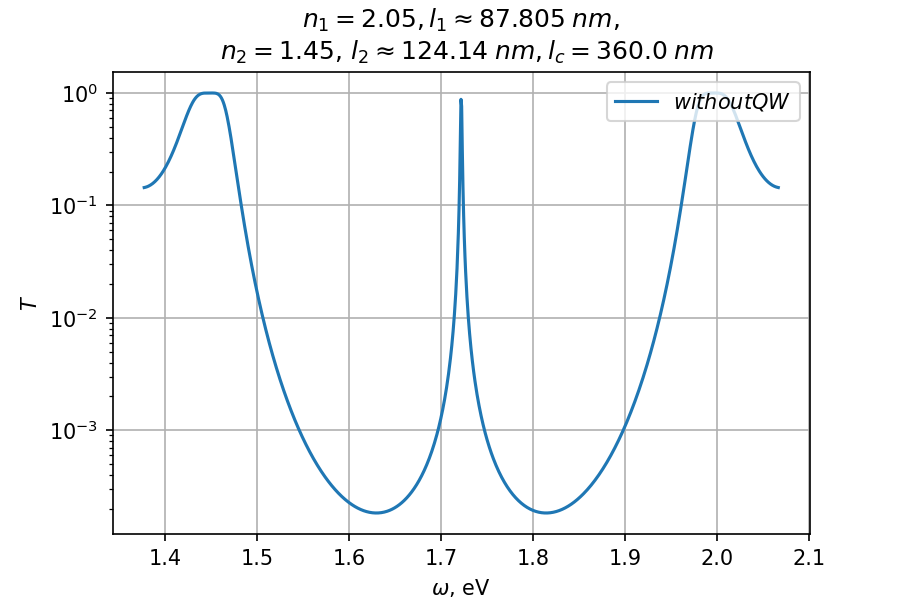

In [382]:
%matplotlib notebook
plt.figure(figsize=(6,4))
#plt.plot(Lambda, R_qw, label=r'$with QW$')
plt.plot(W, T,  label=r'$without QW$')
plt.title(fr'$n_1={n_1}, l_1 \approx {l_1:.5}\; nm$,' +'\n'+  fr' $\, n_2={n_2},\,l_2 \approx {l_2:.5}\; nm , l_c = {l_c}\; nm$')
#plt.vlines(l_c*2, -0.05,1,colors='red', linestyles='--', label=rf'$\lambda_c = {l_0}$' )

#plt.vlines(Lambda[np.argmin(R_qw)], -0.05,1,colors='green', linestyles='--', label=rf'$\lambda_- \approx {Lambda[np.argmin(R_qw)]:.5}$' )
#plt.vlines(Lambda[np.argmin(R_qw[:np.argmin(R_qw)-5])], -0.05,1,colors='green', linestyles='--', label=rf'$\lambda_- \approx {Lambda[np.argmin(R_qw[:np.argmin(R_qw)-5])]:.5}$' )

#
plt.grid()
plt.legend(loc='upper right')
plt.xlabel(r'$\omega$, eV')
plt.ylabel(r'$T$')
#plt.xlim((500, 1000))
#plt.savefig('Shishkin_comparing.pdf')
plt.yscale('log')

<IPython.core.display.Javascript object>


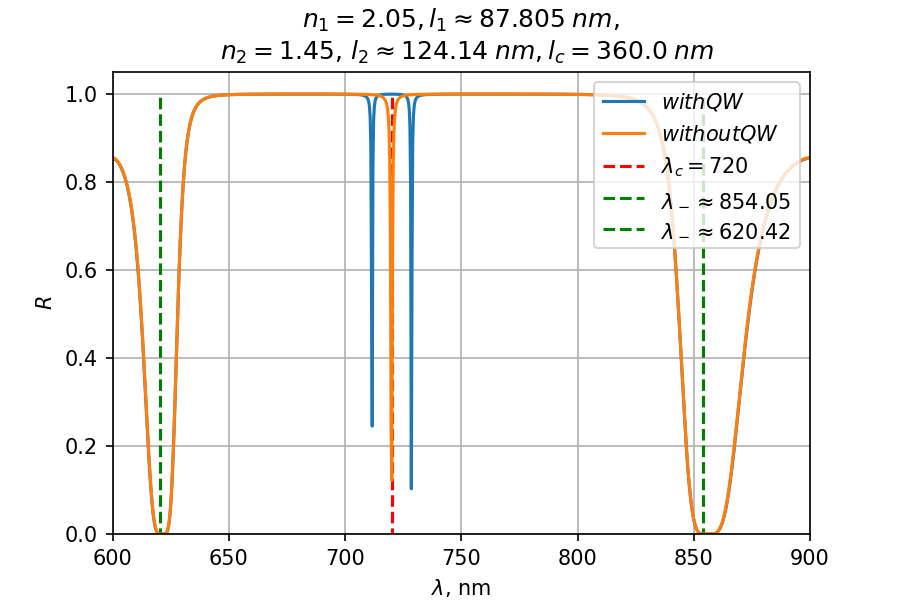

In [211]:
%matplotlib notebook
plt.figure(figsize=(6,4))
plt.plot(Lambda, R_qw, label=r'$with QW$')
plt.plot(Lambda, R,  label=r'$without QW$')
plt.title(fr'$n_1={n_1}, l_1 \approx {l_1:.5}\; nm$,' +'\n'+  fr' $\, n_2={n_2},\,l_2 \approx {l_2:.5}\; nm , l_c = {l_c}\; nm$')
plt.vlines(l_c*2, -0.05,1,colors='red', linestyles='--', label=rf'$\lambda_c = {l_0}$' )

plt.vlines(Lambda[np.argmin(R_qw)], -0.05,1,colors='green', linestyles='--', label=rf'$\lambda_- \approx {Lambda[np.argmin(R_qw)]:.5}$' )
plt.vlines(Lambda[np.argmin(R_qw[:np.argmin(R_qw)-5])], -0.05,1,colors='green', linestyles='--', label=rf'$\lambda_- \approx {Lambda[np.argmin(R_qw[:np.argmin(R_qw)-5])]:.5}$' )

#
plt.grid()
plt.legend(loc='upper right')
plt.xlabel(r'$\lambda$, nm')
plt.ylabel(r'$R$')
plt.xlim((Lambda[0], Lambda[-1]))
plt.ylim(0,1.05)
plt.savefig('Shishkin_comparing.pdf')


### Day 4

In [169]:
Lambda = np.linspace(600, 900, 500)
hbarc =197.33 * 1e6 * 1e-15 *1e9  #197.33 MeV fm
W= 2*np.pi * hbarc/Lambda # eV

R = np.zeros_like(Lambda)
#T = np.zeros_like(Lambda)

Gamma_0 = 1e-3 #eV
Gamma = 1e-4 # eV

W_0 = 2*np.pi * hbarc/l_0 *np.linspace(0.8,1.2, 10)
W = 2*np.pi * hbarc/l_0 *np.linspace(0.8,1.2, 10)
Lambda = 2*np.pi * hbarc/W

L_minus = np.zeros_like(W_0)
L_plus = np.zeros_like(W_0)
for j in tqdm_notebook(range(len(W_0))):
    w_0 = W_0[j]
    for i in range(len(Lambda)):
        lm = Lambda[i]
        w = W[i]
        M_1_i = np.array(M_1.evalf(subs={lambd:lm}), dtype=np.complex128)
        M_2_i = np.array(M_2.evalf(subs={lambd:lm}), dtype=np.complex128)
        M_c_half_i = np.array(M_c_half.evalf(subs={lambd:lm}), dtype=np.complex128)
        
        r_qw = simplify(I*Gamma_0/(w_0 - w - I*(Gamma+Gamma_0)))
        t_qw = 1 + r_qw
        M_qw = np.array([[1,0],[2*r_qw/t_qw,1]], dtype=np.complex128)
        
        T_i = M_1_i @ (M_2_i @ M_1_i)**7 @ M_c_half_i @ M_qw @ M_c_half_i @ M_1_i @ (M_2_i @ M_1_i)**7
        #T_i = simplify(T_i)
        r_i,t_i = get_r_t(T_i)
        #r_i = simplify(r_i)
        #t_i = simplify(t_i)
        R[i] = np.abs(r_i)**2
    
    Ls = np.array([Lambda[np.argmin(R)], Lambda[np.argmin(R[:np.argmin(R)-30])]])
    Ls = np.sort(Ls)
    L_minus[j]=(Ls[0])
    L_plus[j]=(Ls[1])

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_4964/2101913952.py:17: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for j in tqdm_notebook(range(len(W_0))):


  0%|          | 0/10 [00:00<?, ?it/s]

IndexError: index 10 is out of bounds for axis 0 with size 10

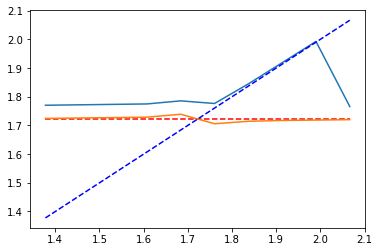

In [53]:
plt.figure()
plt.plot(W_0, 2*np.pi * hbarc/L_minus)
plt.plot(W_0, 2*np.pi * hbarc/L_plus)
plt.hlines(2*np.pi * hbarc/l_0, W_0[0], W_0[-1], colors='red', linestyles='--')
plt.plot(W_0, W_0, '--', c='blue')

In [187]:
#Lambda = np.linspace(600, 900, 500)
hbarc =197.33 * 1e6 * 1e-15 *1e9  #197.33 MeV fm
#W= 2*np.pi * hbarc/Lambda # eV



#T = np.zeros_like(Lambda)

Gamma_0 = 1e-3 #eV
Gamma = 1e-4 # eV

W_0 = 2*np.pi * hbarc/l_0 *np.linspace(0.91, 1.09, 500)
W = 2*np.pi * hbarc/l_0 *np.linspace(0.91, 1.09, 5000)
Lambda = 2*np.pi * hbarc/W

W_0, Lambda = np.meshgrid(W_0, Lambda)

T = np.zeros_like(W_0)
R = np.zeros_like(W_0)
for i in tqdm_notebook(range(W_0.shape[0])):
    w = W[i]
    lm = Lambda[i,0]
    M_1_i = np.array(M_1.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_2_i = np.array(M_2.evalf(subs={lambd:lm}), dtype=np.complex128)
    M_c_half_i = np.array(M_c_half.evalf(subs={lambd:lm}), dtype=np.complex128)
    for j in range(W_0.shape[1]):
        w_0 = W_0[i,j]
        r_qw = 1j*Gamma_0/(w_0 - w - 1j*(Gamma+Gamma_0))
        t_qw = 1 + r_qw
        #M_qw = np.array(simplify(T_qw.subs({r:r_qw, t:t_qw})), dtype=np.complex128)
        M_qw = np.array([[1, 0],[2*r_qw/t_qw, 1]] ,dtype=np.complex128)
    #    
        T_i = M_1_i @np.linalg.matrix_power((M_2_i @ M_1_i),7) @ M_c_half_i @ M_qw @ M_c_half_i @ M_1_i @ np.linalg.matrix_power((M_2_i @ M_1_i),7)
    #    #T_i = simplify(T_i)
        r_i,t_i = get_r_t(T_i)
    #    #r_i = simplify(r_i)
    #    #t_i = simplify(t_i)
        T[i,j] = np.abs(t_i)**2
        R[i,j] = np.abs(r_i)**2

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_4964/2758500950.py:20: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(W_0.shape[0])):


  0%|          | 0/5000 [00:00<?, ?it/s]

In [188]:
G = (w_cav - W[np.argmax(T[:,250])])

<IPython.core.display.Javascript object>


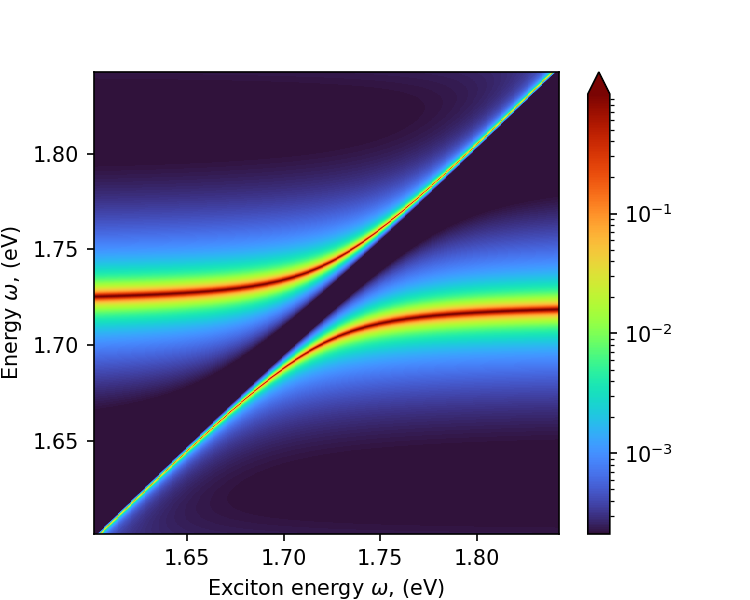

(1.601487069026591, 1.84257114393382)

In [115]:
%matplotlib notebook
plt.figure(figsize=(5,4))

import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
pcm = plt.pcolormesh(W_0 , 2*np.pi * hbarc/Lambda , T , 
                     norm=colors.LogNorm(vmin=T.min()*6000, vmax=T.max()),
                     cmap='turbo', shading='auto')
plt.colorbar(pcm, extend='max')

#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))



w_cav = 2*np.pi * hbarc/l_0
w_ex = W_0[0,:]
w_1 = (w_cav + w_ex + np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2
w_2 = (w_cav + w_ex - np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2




#plt.plot(w_ex, w_1, c='red', linestyle=((0, (5, 10))), lw=0.8)
#plt.plot(w_ex, w_2, c='red', linestyle=((0, (5, 10))), lw=0.8)

plt.xlabel(r'Exciton energy $\omega, \,$(eV)')
plt.ylabel(r'Energy $\omega, \,$(eV)')
#plt.title(r'$\Gamma_0 \approx 6 10^{-4}\omega \approx 1{ meV}$')
#plt.savefig('test.pdf', dpi=1000, bbox_inches='tight')

plt.ylim(W[0], W[-1])
plt.xlim(W[0], W[-1])

<IPython.core.display.Javascript object>


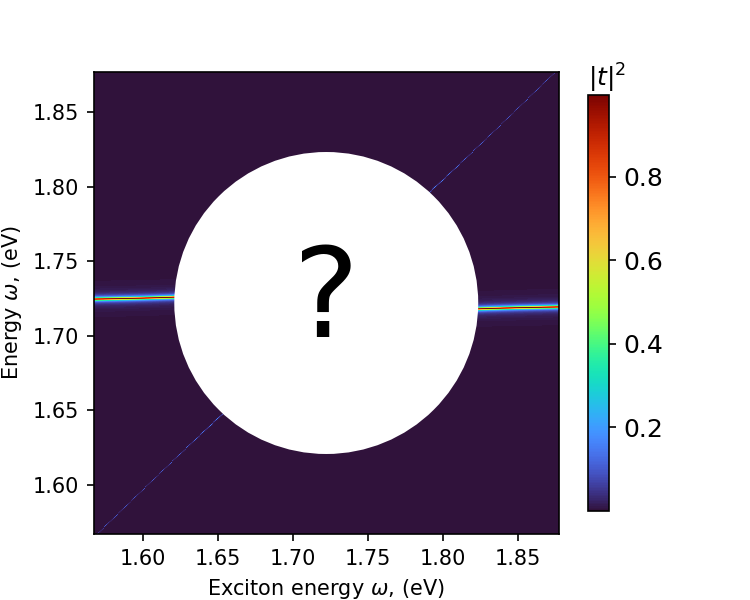

In [196]:
%matplotlib notebook
#plt.figure(figsize=(5,4))
figure, axes = plt.subplots(figsize=(5,4))
import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
pcm = plt.pcolormesh(W_0 , 2*np.pi * hbarc/Lambda , T ,
                     cmap='turbo', shading='auto')
clb = plt.colorbar(pcm, shrink=0.9, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
clb.ax.set_yticklabels(['0', '0.2', '0.4','0.6','0.8','1'])
clb.ax.tick_params(labelsize=12) 
clb.ax.set_title('$|t|^2$',fontsize=12, loc='left',pad=2)


#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))



w_cav = 2*np.pi * hbarc/l_0
w_ex = W_0[0,:]
w_1 = (w_cav + w_ex + np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2
w_2 = (w_cav + w_ex - np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2




#plt.plot(w_ex, w_1, c='red', linestyle=((0, (5, 10))), lw=0.8)
#plt.plot(w_ex, w_2, c='red', linestyle=((0, (5, 10))), lw=0.8)

plt.xlabel(r'Exciton energy $\omega, \,$(eV)')
plt.ylabel(r'Energy $\omega, \,$(eV)')
#plt.title(r'$\Gamma_0 \approx 6 10^{-4}\omega \approx 1{ meV}$')
plt.ylim(W[0], W[-1])
plt.xlim(W[0], W[-1])




t = plt.Circle((2*pi/l_0*hbarc, 2*pi/l_0*hbarc), G*5, color='w')
#axes.set_aspect(1)
axes.add_artist(t)

plt.text(2*pi/l_0*hbarc, 2*pi/l_0*hbarc, '?',
         fontsize=60, ha='center', va='center')

plt.savefig('Polaritions_exciton_1.png', dpi=1000, bbox_inches='tight')



<IPython.core.display.Javascript object>


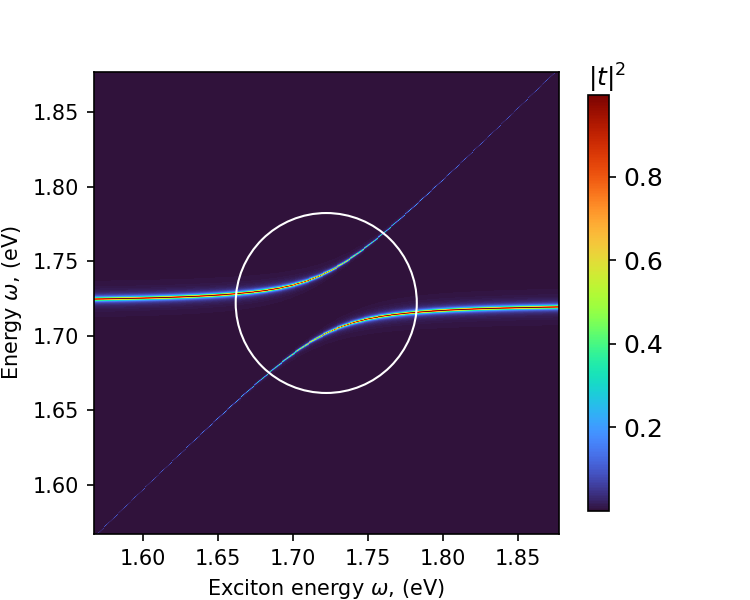

In [195]:
%matplotlib notebook
#plt.figure(figsize=(5,4))
figure, axes = plt.subplots(figsize=(5,4))
import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
pcm = plt.pcolormesh(W_0 , 2*np.pi * hbarc/Lambda , T ,
                     cmap='turbo', shading='auto')
clb = plt.colorbar(pcm, shrink=0.9, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
clb.ax.set_yticklabels(['0', '0.2', '0.4','0.6','0.8','1'])
clb.ax.tick_params(labelsize=12) 
clb.ax.set_title('$|t|^2$',fontsize=12, loc='left',pad=2)


#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))



w_cav = 2*np.pi * hbarc/l_0
w_ex = W_0[0,:]
w_1 = (w_cav + w_ex + np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2
w_2 = (w_cav + w_ex - np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2




#plt.plot(w_ex, w_1, c='red', linestyle=((0, (5, 10))), lw=0.8)
#plt.plot(w_ex, w_2, c='red', linestyle=((0, (5, 10))), lw=0.8)

plt.xlabel(r'Exciton energy $\omega, \,$(eV)')
plt.ylabel(r'Energy $\omega, \,$(eV)')
#plt.title(r'$\Gamma_0 \approx 6 10^{-4}\omega \approx 1{ meV}$')
plt.ylim(W[0], W[-1])
plt.xlim(W[0], W[-1])




t = plt.Circle((2*pi/l_0*hbarc, 2*pi/l_0*hbarc), G*3, color='w', fill=False)
#axes.set_aspect(1)
axes.add_artist(t)

plt.savefig('Polaritions_exciton_2.png', dpi=1000, bbox_inches='tight')



<IPython.core.display.Javascript object>


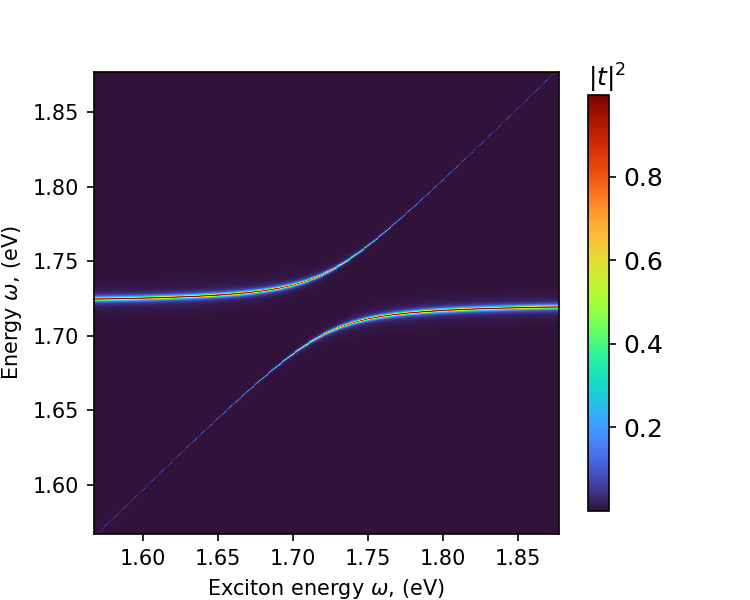

In [198]:
%matplotlib notebook
#plt.figure(figsize=(5,4))
figure, axes = plt.subplots(figsize=(5,4))
import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
pcm = plt.pcolormesh(W_0 , 2*np.pi * hbarc/Lambda , T ,
                     cmap='turbo', shading='auto')
clb = plt.colorbar(pcm, shrink=0.9, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
clb.ax.set_yticklabels(['0', '0.2', '0.4','0.6','0.8','1'])
clb.ax.tick_params(labelsize=12) 
clb.ax.set_title('$|t|^2$',fontsize=12, loc='left',pad=2)


#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))



w_cav = 2*np.pi * hbarc/l_0
w_ex = W_0[0,:]
w_1 = (w_cav + w_ex + np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2
w_2 = (w_cav + w_ex - np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2




#plt.plot(w_ex, w_1, c='red', linestyle=((0, (5, 10))), lw=0.8)
#plt.plot(w_ex, w_2, c='red', linestyle=((0, (5, 10))), lw=0.8)

plt.xlabel(r'Exciton energy $\omega, \,$(eV)')
plt.ylabel(r'Energy $\omega, \,$(eV)')
#plt.title(r'$\Gamma_0 \approx 6 10^{-4}\omega \approx 1{ meV}$')
plt.ylim(W[0], W[-1])
plt.xlim(W[0], W[-1])




plt.savefig('Polaritions_exciton_0.png', dpi=1000, bbox_inches='tight')



<IPython.core.display.Javascript object>


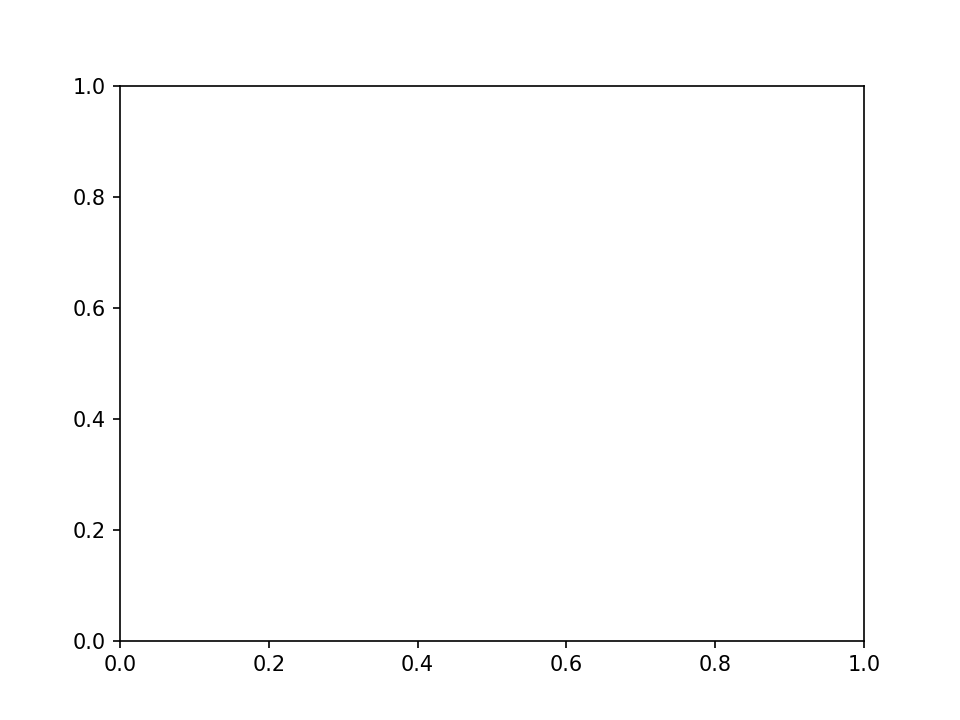

In [181]:
figure, axes = plt.subplots()
t = plt.Circle((2*pi/l_0*hbarc, 2*pi/l_0*hbarc), 2*pi/l_0*hbarc*0.5)
#axes.set_aspect(1)
axes.add_artist(t)

<IPython.core.display.Javascript object>


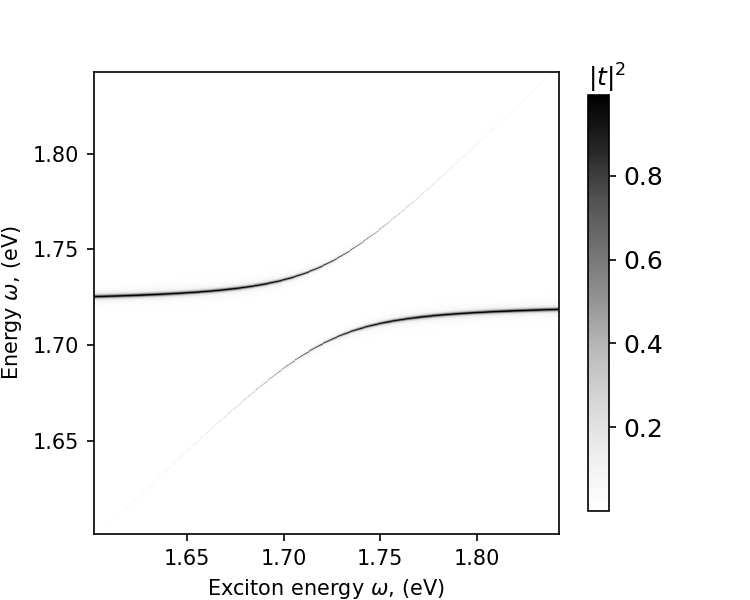

(1.601487069026591, 1.84257114393382)

In [149]:
%matplotlib notebook
plt.figure(figsize=(5,4))

import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
pcm = plt.pcolormesh(W_0 , 2*np.pi * hbarc/Lambda , T ,
                     cmap='Greys', shading='auto')
clb = plt.colorbar(pcm, shrink=0.9, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
clb.ax.set_yticklabels(['0', '0.2', '0.4','0.6','0.8','1'])
clb.ax.tick_params(labelsize=12) 
clb.ax.set_title('$|t|^2$',fontsize=12, loc='left',pad=2)


#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))



w_cav = 2*np.pi * hbarc/l_0
w_ex = W_0[0,:]
w_1 = (w_cav + w_ex + np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2
w_2 = (w_cav + w_ex - np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2




#plt.plot(w_ex, w_1, c='red', linestyle=((0, (5, 10))), lw=0.8)
#plt.plot(w_ex, w_2, c='red', linestyle=((0, (5, 10))), lw=0.8)

plt.xlabel(r'Exciton energy $\omega, \,$(eV)')
plt.ylabel(r'Energy $\omega, \,$(eV)')
#plt.title(r'$\Gamma_0 \approx 6 10^{-4}\omega \approx 1{ meV}$')
plt.savefig('Polaritions_exciton.png', dpi=1000, bbox_inches='tight')

plt.ylim(W[0], W[-1])
plt.xlim(W[0], W[-1])

<IPython.core.display.Javascript object>


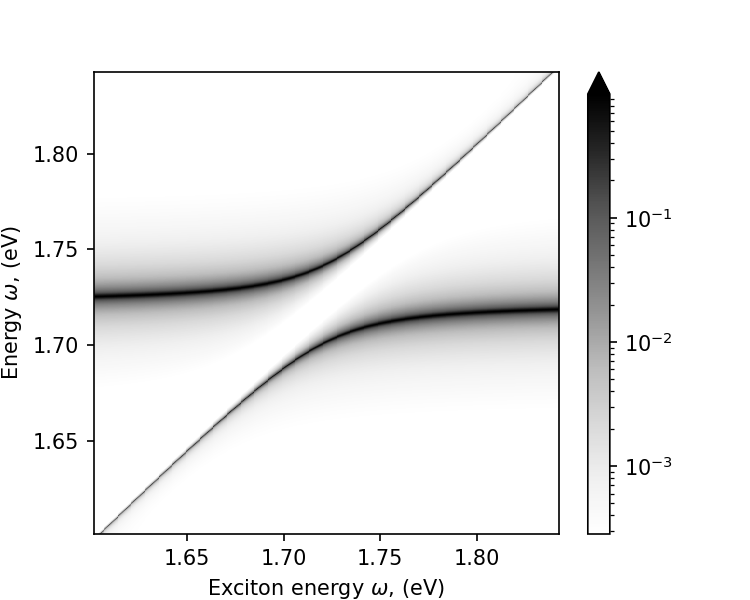

(1.601487069026591, 1.84257114393382)

In [147]:
%matplotlib notebook
plt.figure(figsize=(5,4))

import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
pcm = plt.pcolormesh(W_0 , 2*np.pi * hbarc/Lambda , T , 
                     norm=colors.LogNorm(vmin=T.min()*8000, vmax=T.max()),
                     cmap='Greys', shading='auto')
plt.colorbar(pcm, extend='max')

#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))



w_cav = 2*np.pi * hbarc/l_0
w_ex = W_0[0,:]
w_1 = (w_cav + w_ex + np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2
w_2 = (w_cav + w_ex - np.sqrt(4*G**2 + (w_cav-w_ex)**2))/2




#plt.plot(w_ex, w_1, c='red', linestyle=((0, (5, 10))), lw=0.8)
#plt.plot(w_ex, w_2, c='red', linestyle=((0, (5, 10))), lw=0.8)

plt.xlabel(r'Exciton energy $\omega, \,$(eV)')
plt.ylabel(r'Energy $\omega, \,$(eV)')
#plt.title(r'$\Gamma_0 \approx 6 10^{-4}\omega \approx 1{ meV}$')
#plt.savefig('test.pdf', dpi=1000, bbox_inches='tight')

plt.ylim(W[0], W[-1])
plt.xlim(W[0], W[-1])

<IPython.core.display.Javascript object>


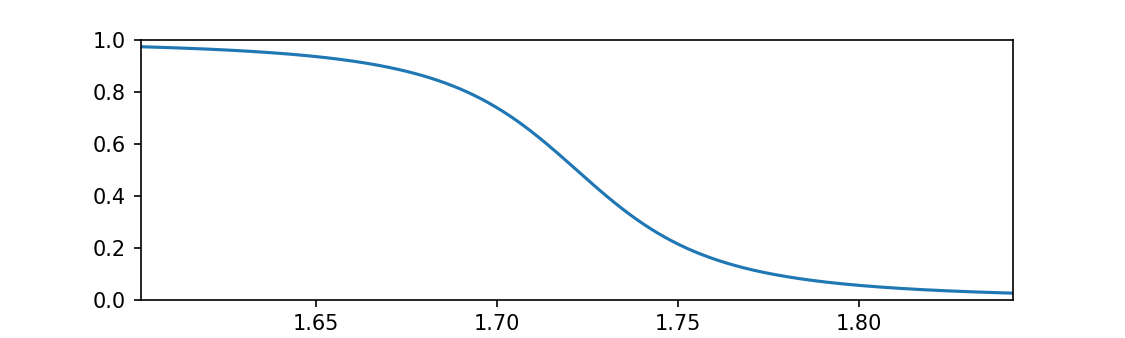

(1.601487069026591, 1.84257114393382)

In [131]:
plt.figure(figsize=(5,1.5))
phi = 1/2*np.arctan(2*G/(w_ex - w_cav))
f_1 = np.cos(phi)**2
f_2 = np.sin(phi)**2
f = np.concatenate((f_1[:250],f_2[250:]))
plt.plot(w_ex, f)
plt.ylim(0,1)
plt.xlim(w_ex[0],w_ex[-1])
#plt.grid()

<IPython.core.display.Javascript object>


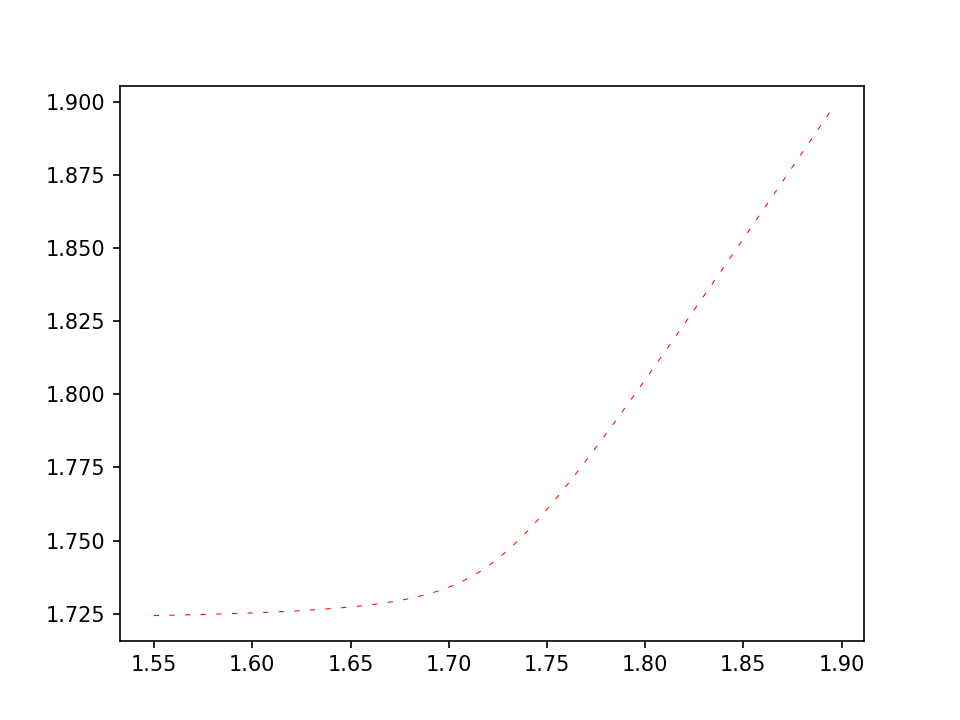

In [349]:
plt.figure()
plt.plot(w_ex, w_1, c='red', linestyle=((0, (5, 10))), lw=0.5)

<IPython.core.display.Javascript object>


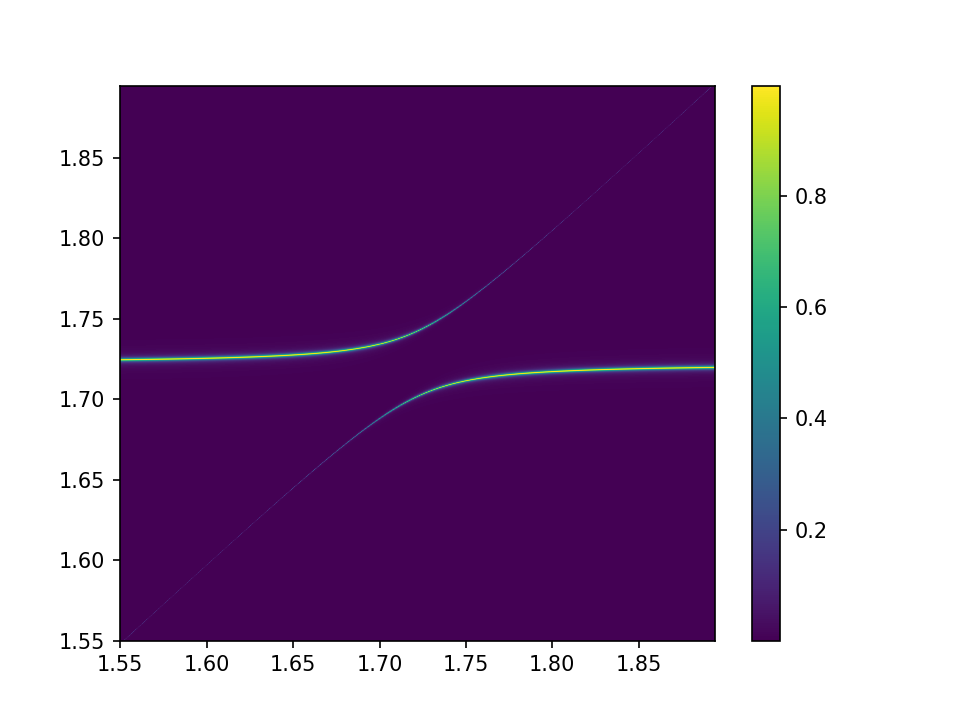

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/1062958426.py:1: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(W_0, 2*np.pi * hbarc/Lambda, T)


In [298]:
plt.pcolormesh(W_0, 2*np.pi * hbarc/Lambda, T)
plt.colorbar()

### Day 4

In [786]:
w, k_z, r,t  = symbols('omega k_z r t')
T_00, T_01, T_10, T_11 = symbols('T_{00} T_{01} T_{10} T_{11}')

In [841]:
T = zeros(2,2)
T[0,0] = T_00
T[0,1] = T_01
T[1,0] = T_10
T[1,1] = T_11

### TE mode

In [499]:
M_TE = Matrix([[cos(k_z*l), -I*w/k_z*sin(k_z*l)],[-I*k_z/w*sin(k_z*l), cos(k_z*l)]]) ## w = w/c

In [501]:
M_TE

Matrix([
[             cos(k_z*l), -I*omega*sin(k_z*l)/k_z],
[-I*k_z*sin(k_z*l)/omega,              cos(k_z*l)]])

In [534]:
lp = Matrix([1+r, k_z/w*(-1+r)])

In [535]:
T

Matrix([
[T_{00}, T_{01}],
[T_{10}, T_{11}]])

In [536]:
lp

Matrix([
[            r + 1],
[k_z*(r - 1)/omega]])

In [537]:
rp = Matrix([t, -k_z/w*t])

In [538]:
rp

Matrix([
[           t],
[-k_z*t/omega]])

In [539]:
u1 = expand(simplify(T @ lp - rp)[0])
u2 = expand(simplify(T @ lp - rp)[1])

In [540]:
Op = zeros(2,2)
rs = zeros(2,1)
Op[0,0] = u1.coeff(r, 1)
Op[0,1] = u1.coeff(t, 1)
rs[0,0] = simplify(u1 - Op[0,0]*r - Op[0,1]*t)

Op[1,0] = u2.coeff(r, 1)
Op[1,1] = u2.coeff(t, 1)
rs[1,0] = simplify(u2 - Op[1,0]*r - Op[1,1]*t)

In [541]:
Op

Matrix([
[T_{00} + T_{01}*k_z/omega,        -1],
[T_{10} + T_{11}*k_z/omega, k_z/omega]])

In [542]:
rs

Matrix([
[T_{00} - T_{01}*k_z/omega],
[T_{10} - T_{11}*k_z/omega]])

In [911]:
M_TE

Matrix([
[             cos(k_z*l), -I*omega*sin(k_z*l)/k_z],
[-I*k_z*sin(k_z*l)/omega,              cos(k_z*l)]])

In [543]:
r_res_TE, t_res_TE = simplify(Op.inv() @ rs)

In [910]:
r_res_TE.subs(w,1)

(T_{10} - T_{11}*k_z + k_z*(T_{00} - T_{01}*k_z))/(T_{00}*k_z + T_{01}*k_z**2 + T_{10} + T_{11}*k_z)

In [545]:
t_res_TE

2*k_z*omega*(-T_{00}*T_{11} + T_{01}*T_{10})/(T_{00}*k_z*omega + T_{01}*k_z**2 + T_{10}*omega**2 + T_{11}*k_z*omega)

In [4]:
def get_r_t_TE(T_, k_z_w):
    r_ = k_z_w*(T_[0,0]-T_[1,1]) - k_z_w**2 * T_[0,1] + T_[1,0]
    r_/= (T_[0,0]+T_[1,1])*k_z_w + (T_[0,1]*k_z_w**2 +  T_[1,0])
    t_ = -2*k_z_w
    t_ /= (T_[0,0]+T_[1,1])*k_z_w + (T_[0,1]*k_z_w**2 +  T_[1,0])
    return (r_,t_)

#### QW transit

In [880]:
eq1 = expand(simplify(T @ Matrix([1+r, k_z/w*(r-1)]) - Matrix([t, -k_z/w*t]))[0])
eq2 = expand(simplify(T @ Matrix([1+r, k_z/w*(r-1)]) - Matrix([t, -k_z/w*t]))[1])

eq3 = expand(simplify(T @ Matrix([t, k_z/w*t]) - Matrix([1+r, k_z/w*(1-r)]))[0])
eq4 = expand(simplify(T @ Matrix([t, k_z/w*t]) - Matrix([1+r, k_z/w*(1-r)]))[1])
#u2 = expand(simplify(T @ lp - rp)[1])

In [881]:
sol = solve((eq1, eq2, eq3, eq4), T_00, T_01, T_10, T_11)

In [882]:
keys = list(sol.keys())

In [884]:
Ans = Matrix([[sol[keys[0]], sol[keys[1]]],[sol[keys[2]], sol[keys[3]]]])

In [885]:
Ans

Matrix([
[                         (-r**2 + t**2 + 1)/(2*t), (omega*r**2 + 2*omega*r - omega*t**2 + omega)/(2*k_z*t)],
[(k_z*r**2 - 2*k_z*r - k_z*t**2 + k_z)/(2*omega*t),                                (-r**2 + t**2 + 1)/(2*t)]])

In [886]:
simplify(Ans.subs(t, r+1))

Matrix([
[                       1, 0],
[-2*k_z*r/(omega*(r + 1)), 1]])

### TM mode

In [895]:
M_TM = Matrix([[cos(k_z*l), I*k_z/w/eps*sin(k_z*l)],[I*w/k_z*eps*sin(k_z*l), cos(k_z*l)]]) ## w = w/c

In [898]:
lp = Matrix([(1+r), w/k_z*(1-r)])

In [899]:
lp

Matrix([
[            r + 1],
[omega*(1 - r)/k_z]])

In [908]:
T

Matrix([
[T_{00}, T_{01}],
[T_{10}, T_{11}]])

In [900]:
rp = Matrix([t, t*w/k_z])

In [901]:
rp

Matrix([
[          t],
[omega*t/k_z]])

In [902]:
u1 = expand(simplify(T @ lp - rp)[0])
u2 = expand(simplify(T @ lp - rp)[1])

In [903]:
Op = zeros(2,2)
rs = zeros(2,1)
Op[0,0] = u1.coeff(r, 1)
Op[0,1] = u1.coeff(t, 1)
rs[0,0] = simplify(u1 - Op[0,0]*r - Op[0,1]*t)

Op[1,0] = u2.coeff(r, 1)
Op[1,1] = u2.coeff(t, 1)
rs[1,0] = simplify(u2 - Op[1,0]*r - Op[1,1]*t)

In [904]:
r_res_TM, t_res_TM = simplify(Op.inv() @ rs)

In [894]:
M_TM

Matrix([
[                    cos(k_z*l), I*k_z*sin(k_z*l)/(epsilon*omega)],
[I*epsilon*omega*sin(k_z*l)/k_z,                       cos(k_z*l)]])

In [907]:
simplify(r_res_TM.subs(w,1))

(T_{00}*k_z + T_{01} - k_z*(T_{10}*k_z + T_{11}))/(T_{00}*k_z - T_{01} - T_{10}*k_z**2 + T_{11}*k_z)

In [912]:
simplify(t_res_TM.subs(w,1))

2*k_z*(-T_{00}*T_{11} + T_{01}*T_{10})/(T_{00}*k_z - T_{01} - T_{10}*k_z**2 + T_{11}*k_z)

In [5]:
def get_r_t_TM(T_, k_z_w):
    r_ = T_[0,0]*k_z_w + T_[0,1] - k_z_w*(k_z_w*T_[1,0]+T_[1,1])
    r_/= T_[0,0]*k_z_w - T_[0,1] - k_z_w**2*T_[1,0]+T_[1,1]*k_z_w
    t_ = -2*k_z_w
    t_ /= T_[0,0]*k_z_w - T_[0,1] - k_z_w**2*T_[1,0]+T_[1,1]*k_z_w
    return (r_,t_)

#### QW transit

In [887]:
eq1 = expand(simplify(T @ Matrix([1+r, w/k_z*(1-r)]) - Matrix([t, w/k_z*t]))[0])
eq2 = expand(simplify(T @ Matrix([1+r, w/k_z*(1-r)]) - Matrix([t, w/k_z*t]))[1])

eq3 = expand(simplify(T @ Matrix([t, -1/k_z*w*t]) - Matrix([1+r, 1/k_z*w*(r-1)]))[0])
eq4 = expand(simplify(T @ Matrix([t, -1/k_z*w*t]) - Matrix([1+r, 1/k_z*w*(r-1)]))[1])
#u2 = expand(simplify(T @ lp - rp)[1])

In [888]:
sol = solve((eq1, eq2, eq3, eq4), T_00, T_01, T_10, T_11)

In [889]:
keys = list(sol.keys())

In [890]:
Ans = Matrix([[sol[keys[0]], sol[keys[1]]],[sol[keys[2]], sol[keys[3]]]])

In [891]:
Ans

Matrix([
[                                (-r**2 + t**2 + 1)/(2*t), (-k_z*r**2 - 2*k_z*r + k_z*t**2 - k_z)/(2*omega*t)],
[(-omega*r**2 + 2*omega*r + omega*t**2 - omega)/(2*k_z*t),                           (-r**2 + t**2 + 1)/(2*t)]])

In [892]:
simplify(Ans.subs(t, r+1))

Matrix([
[                      1, 0],
[2*omega*r/(k_z*(r + 1)), 1]])

### Empty cavity

In [199]:
n_1 = 2.05
l_0 = 720 #nm

l_1 = l_0/n_1/4 #nm

n_2 = 1.45
l_2 =  l_0/n_2/4#nm

n_c = 1
l_c = l_0/2  # nm

In [915]:
M_TE

Matrix([
[             cos(k_z*l), -I*omega*sin(k_z*l)/k_z],
[-I*k_z*sin(k_z*l)/omega,              cos(k_z*l)]])

In [916]:
M_TM

Matrix([
[                    cos(k_z*l), I*k_z*sin(k_z*l)/(epsilon*omega)],
[I*epsilon*omega*sin(k_z*l)/k_z,                       cos(k_z*l)]])

In [917]:
W = 2*np.pi * hbarc/l_0 *np.linspace(0.96, 1.4, 2000)
#K_x = np.array([0], dtype=np.complex128)
K_x = np.array(np.linspace(0,2*np.pi/l_0*1.2,500), dtype=np.complex128)

K_x, W = np.meshgrid(K_x, W)
R_TE = np.zeros_like(W)
T_tr_TE = np.zeros_like(W)
R_TM = np.zeros_like(W)
T_tr_TM = np.zeros_like(W)

K_z = np.sqrt(-K_x**2 +  (W/hbarc)**2)
K_z_c = np.sqrt(-K_x**2 + n_c**2 * (W/hbarc)**2)
K_z_1 = np.sqrt(-K_x**2 + n_1**2 * (W/hbarc)**2)
K_z_2 = np.sqrt(-K_x**2 + n_2**2 * (W/hbarc)**2)

In [918]:
for i in tqdm_notebook(range(K_x.shape[0])):
    for j in range(K_x.shape[1]):
        if K_z[i,j].imag > 0 :
            continue
        M_1 = np.array([[np.cos(K_z_1[i,j]*l_1), -1j*(W[i,j]/hbarc)*np.sin(K_z_1[i,j]*l_1)/K_z_1[i,j]],[-1j*K_z_1[i,j]*np.sin(K_z_1[i,j]*l_1)/(W[i,j]/hbarc),np.cos(K_z_1[i,j]*l_1)]], dtype=np.complex128)
        M_2 = np.array([[np.cos(K_z_2[i,j]*l_2), -1j*(W[i,j]/hbarc)*np.sin(K_z_2[i,j]*l_2)/K_z_2[i,j]],[-1j*K_z_2[i,j]*np.sin(K_z_2[i,j]*l_2)/(W[i,j]/hbarc),np.cos(K_z_2[i,j]*l_2)]], dtype=np.complex128)
        M_c = np.array([[np.cos(K_z_c[i,j]*l_c), -1j*(W[i,j]/hbarc)*np.sin(K_z_c[i,j]*l_c)/K_z_c[i,j]],[-1j*K_z_c[i,j]*np.sin(K_z_c[i,j]*l_c)/(W[i,j]/hbarc),np.cos(K_z_c[i,j]*l_c)]], dtype=np.complex128)
        T_TE = M_1 @ np.linalg.matrix_power(M_2 @ M_1,7) @ M_c @ M_1 @ np.linalg.matrix_power(M_2 @ M_1,7)
        r_,t_ = get_r_t_TE(T_TE, K_z[i,j]/(W[i,j]/hbarc))
        #print(M_2, K_z[i,j]/(W[i,j]/hbarc))
        R_TE[i,j] = np.abs(r_)**2
        T_tr_TE[i,j] = np.abs(t_)**2
        
        M_1 = np.array([[np.cos(K_z_1[i,j]*l_1), 1j*np.sin(K_z_1[i,j]*l_1)*K_z_1[i,j]/n_1**2/(W[i,j]/hbarc)],[1j/K_z_1[i,j]*n_1**2*(W[i,j]/hbarc)*np.sin(K_z_1[i,j]*l_1),np.cos(K_z_1[i,j]*l_1)]], dtype=np.complex128)
        M_2 = np.array([[np.cos(K_z_2[i,j]*l_2), 1j*np.sin(K_z_2[i,j]*l_2)*K_z_2[i,j]/n_2**2/(W[i,j]/hbarc)],[1j/K_z_2[i,j]*n_2**2*(W[i,j]/hbarc)*np.sin(K_z_2[i,j]*l_2),np.cos(K_z_2[i,j]*l_2)]], dtype=np.complex128)
        M_c = np.array([[np.cos(K_z_c[i,j]*l_c), 1j*np.sin(K_z_c[i,j]*l_c)*K_z_c[i,j]/n_c**2/(W[i,j]/hbarc)],[1j/K_z_c[i,j]*n_c**2*(W[i,j]/hbarc)*np.sin(K_z_c[i,j]*l_c),np.cos(K_z_c[i,j]*l_c)]], dtype=np.complex128)
        T_TM = M_1 @ np.linalg.matrix_power(M_2 @ M_1,7) @ M_c @ M_1 @ np.linalg.matrix_power(M_2 @ M_1,7)
        r_,t_ = get_r_t_TM(T_TM, K_z[i,j]/(W[i,j]/hbarc))
        #print(M_2, K_z[i,j]/(W[i,j]/hbarc))
        R_TM[i,j] = np.abs(r_)**2
        T_tr_TM[i,j] = np.abs(t_)**2

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/978289080.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(K_x.shape[0])):


  0%|          | 0/2000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


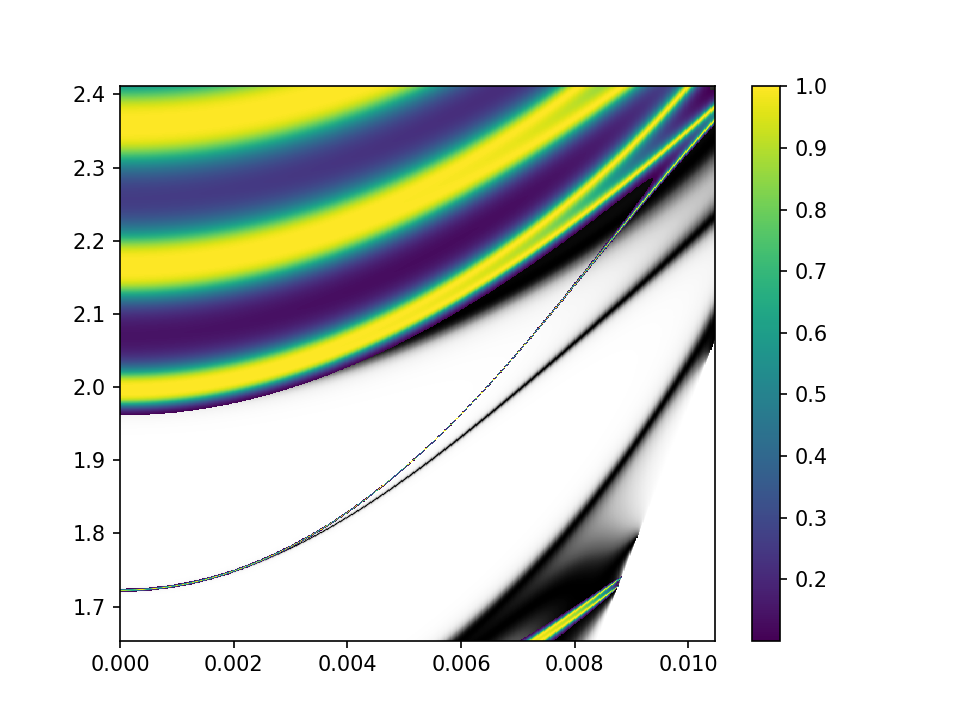

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/13547646.py:7: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(K_x.real , W , T_tr_TM, cmap='Greys')
C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/13547646.py:8: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(K_x.real , W , Test_TE)


In [919]:
plt.figure()
Test_TE=T_tr_TE
Test_TE[Test_TE<0.1] = np.nan
#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan

plt.pcolormesh(K_x.real , W , T_tr_TM, cmap='Greys')
plt.pcolormesh(K_x.real , W , Test_TE)

plt.colorbar()
#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))

In [927]:
K_x[1,400]

(0.008394369147868518+0j)

<IPython.core.display.Javascript object>


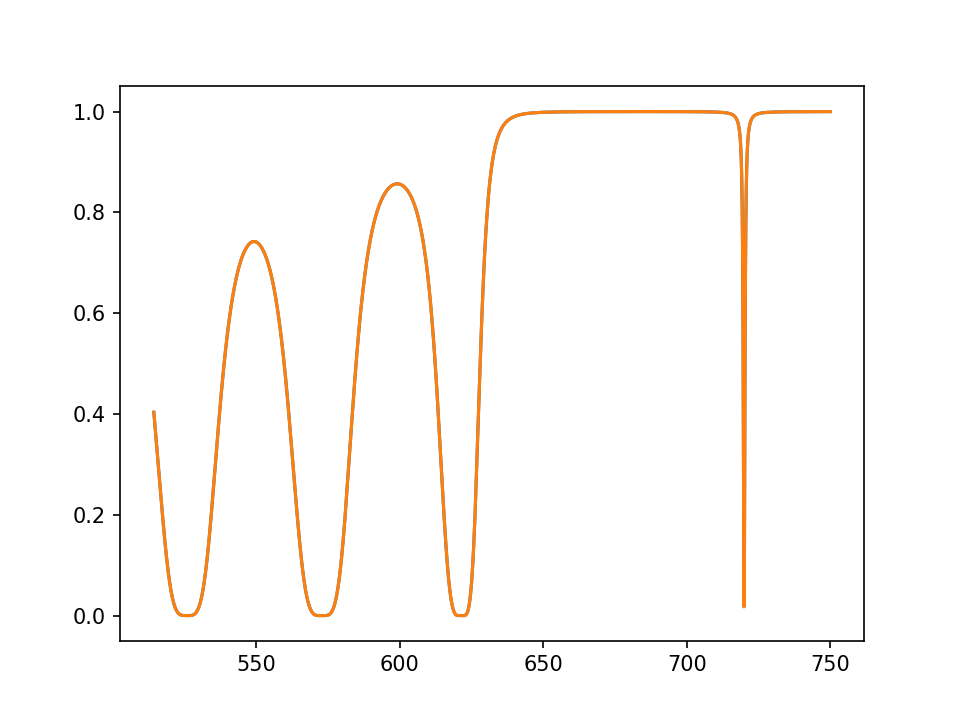

In [928]:
plt.figure()
plt.plot(2*np.pi*hbarc/W[:,0],R_TE[:,0])
plt.plot(2*np.pi*hbarc/W[:,0],R_TM[:,0])


<IPython.core.display.Javascript object>


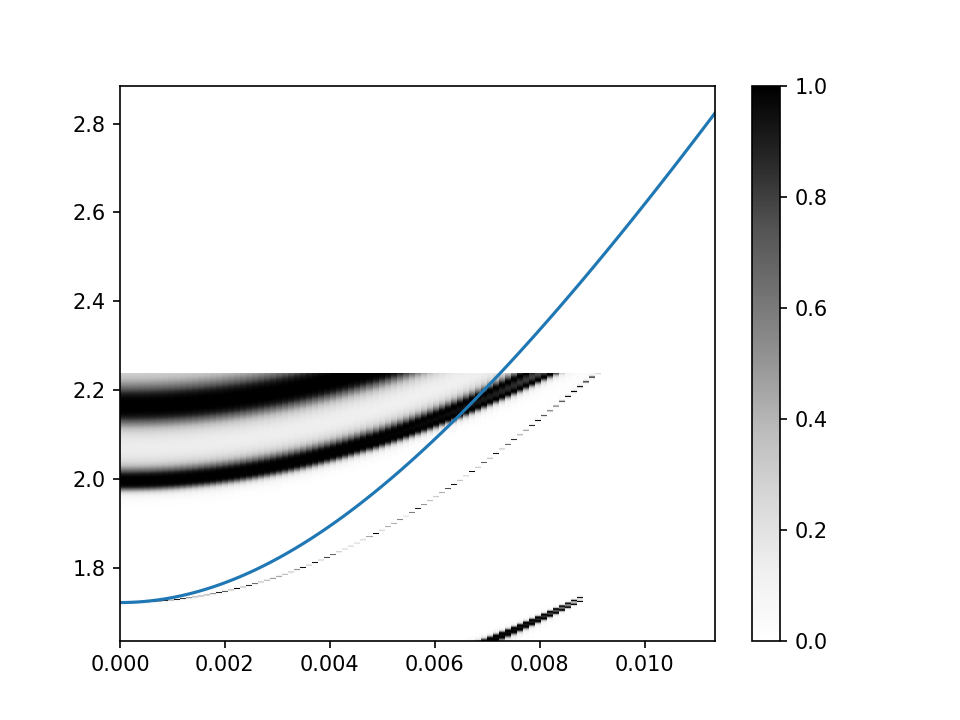

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_14624/3121262433.py:3: MatplotlibDeprecationWarning: shading='flat' when X and Y have the same dimensions as C is deprecated since 3.3.  Either specify the corners of the quadrilaterals with X and Y, or pass shading='auto', 'nearest' or 'gouraud', or set rcParams['pcolor.shading'].  This will become an error two minor releases later.
  plt.pcolormesh(K_x.real , W , T_tr_TE, cmap='Greys')
C:\Users\Mvideo\anaconda3\lib\site-packages\numpy\core\_asarray.py:102: ComplexWarning: Casting complex values to real discards the imaginary part
  return array(a, dtype, copy=False, order=order)


In [823]:
plt.figure()
#plt.pcolormesh(K_x.real , W , T_tr_TE, cmap='Greys')
plt.pcolormesh(K_x.real , W , T_tr_TE, cmap='Greys')

plt.colorbar()
plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))

### With QW

In [234]:
W = 2*np.pi * hbarc/l_0 *np.linspace(0.96, 1.07, 2000)
#K_x = np.array([0], dtype=np.complex128)
K_x = np.array(np.linspace(0,2*np.pi/l_0*(0.5),500), dtype=np.complex128)

Gamma_0 = 0 #eV
Gamma = 1e-4 # eV


w_0_ex = 2*np.pi * hbarc/l_0 * (1.02)


K_x, W = np.meshgrid(K_x, W)
R_TE = np.zeros_like(W)
T_tr_TE = np.zeros_like(W)
R_TM = np.zeros_like(W)
T_tr_TM = np.zeros_like(W)

K_z = np.sqrt(-K_x**2 +  (W/hbarc)**2)
K_z_c = np.sqrt(-K_x**2 + n_c**2 * (W/hbarc)**2)
K_z_1 = np.sqrt(-K_x**2 + n_1**2 * (W/hbarc)**2)
K_z_2 = np.sqrt(-K_x**2 + n_2**2 * (W/hbarc)**2)

In [235]:
for i in tqdm_notebook(range(K_x.shape[0])):
    for j in range(K_x.shape[1]):
        if K_z[i,j].imag > 0 :
            continue
        M_1 = np.array([[np.cos(K_z_1[i,j]*l_1), -1j*(W[i,j]/hbarc)*np.sin(K_z_1[i,j]*l_1)/K_z_1[i,j]],[-1j*K_z_1[i,j]*np.sin(K_z_1[i,j]*l_1)/(W[i,j]/hbarc),np.cos(K_z_1[i,j]*l_1)]], dtype=np.complex128)
        M_2 = np.array([[np.cos(K_z_2[i,j]*l_2), -1j*(W[i,j]/hbarc)*np.sin(K_z_2[i,j]*l_2)/K_z_2[i,j]],[-1j*K_z_2[i,j]*np.sin(K_z_2[i,j]*l_2)/(W[i,j]/hbarc),np.cos(K_z_2[i,j]*l_2)]], dtype=np.complex128)
        M_c_half = np.array([[np.cos(K_z_c[i,j]*l_c/2), -1j*(W[i,j]/hbarc)*np.sin(K_z_c[i,j]*l_c/2)/K_z_c[i,j]],[-1j*K_z_c[i,j]*np.sin(K_z_c[i,j]*l_c/2)/(W[i,j]/hbarc),np.cos(K_z_c[i,j]*l_c/2)]], dtype=np.complex128)
        
        
        r_qw = 1j*Gamma_0/(w_0_ex - W[i,j] - 1j*(Gamma+Gamma_0))
        t_qw = 1 + r_qw
        M_qw = np.array([[1,0],[-2*r_qw/t_qw*K_z[i,j]/(W[i,j]/hbarc),1]], dtype=np.complex128)
        
        
        T_TE = M_1 @ np.linalg.matrix_power((M_2 @ M_1),7) @ M_c_half @ M_qw @ M_c_half @ M_1 @ np.linalg.matrix_power((M_2 @ M_1),7)
        
        
        r_,t_ = get_r_t_TE(T_TE, K_z[i,j]/(W[i,j]/hbarc))
        #print(M_2, K_z[i,j]/(W[i,j]/hbarc))
        R_TE[i,j] = np.abs(r_)**2
        T_tr_TE[i,j] = np.abs(t_)**2
        
        #####################
        
        M_1 = np.array([[np.cos(K_z_1[i,j]*l_1), 1j*np.sin(K_z_1[i,j]*l_1)*K_z_1[i,j]/n_1**2/(W[i,j]/hbarc)],[1j/K_z_1[i,j]*n_1**2*(W[i,j]/hbarc)*np.sin(K_z_1[i,j]*l_1),np.cos(K_z_1[i,j]*l_1)]], dtype=np.complex128)
        M_2 = np.array([[np.cos(K_z_2[i,j]*l_2), 1j*np.sin(K_z_2[i,j]*l_2)*K_z_2[i,j]/n_2**2/(W[i,j]/hbarc)],[1j/K_z_2[i,j]*n_2**2*(W[i,j]/hbarc)*np.sin(K_z_2[i,j]*l_2),np.cos(K_z_2[i,j]*l_2)]], dtype=np.complex128)
        M_c_half = np.array([[np.cos(K_z_c[i,j]*l_c/2), 1j*np.sin(K_z_c[i,j]*l_c/2)*K_z_c[i,j]/n_c**2/(W[i,j]/hbarc)],[1j/K_z_c[i,j]*n_c**2*(W[i,j]/hbarc)*np.sin(K_z_c[i,j]*l_c/2),np.cos(K_z_c[i,j]*l_c/2)]], dtype=np.complex128)
        

        M_qw = np.array([[1,0],[2*r_qw/t_qw/K_z[i,j]*(W[i,j]/hbarc),1]], dtype=np.complex128)
        
        
        T_TM = M_1 @ np.linalg.matrix_power((M_2 @ M_1),7) @ M_c_half @ M_qw @ M_c_half @ M_1 @ np.linalg.matrix_power((M_2 @ M_1),7)
        r_,t_ = get_r_t_TM(T_TM, K_z[i,j]/(W[i,j]/hbarc))
        #print(M_2, K_z[i,j]/(W[i,j]/hbarc))
        R_TM[i,j] = np.abs(r_)**2
        T_tr_TM[i,j] = np.abs(t_)**2

C:\Users\Mvideo\AppData\Local\Temp/ipykernel_4964/2478366166.py:1: TqdmDeprecationWarning: This function will be removed in tqdm==5.0.0
Please use `tqdm.notebook.tqdm` instead of `tqdm.tqdm_notebook`
  for i in tqdm_notebook(range(K_x.shape[0])):


  0%|          | 0/2000 [00:00<?, ?it/s]

<IPython.core.display.Javascript object>


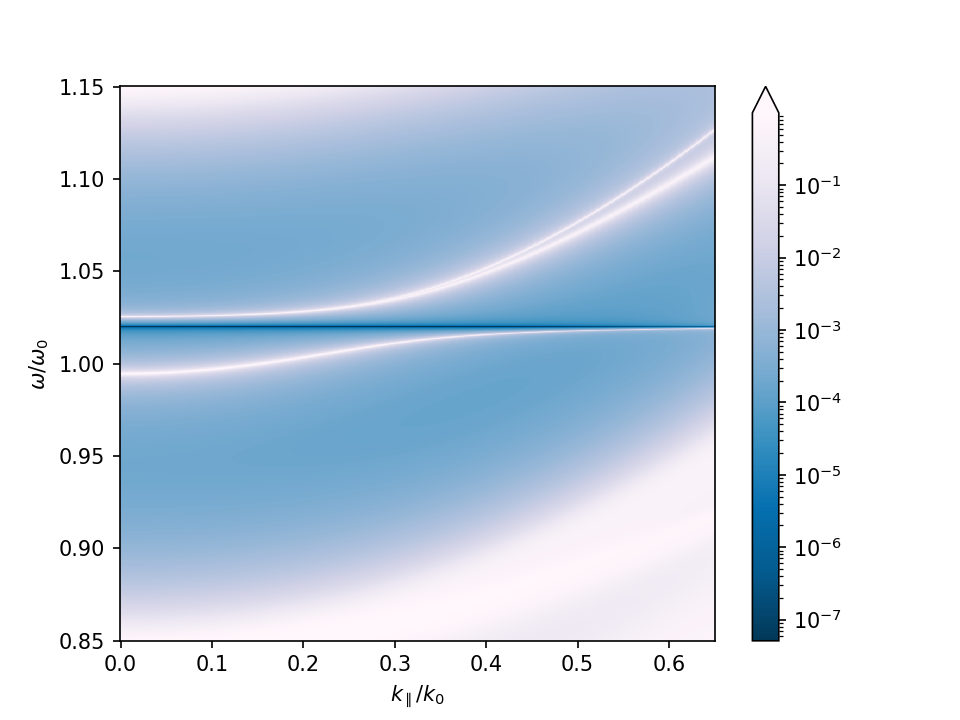

Text(0, 0.5, '$\\omega/\\omega_0$')

In [988]:
plt.figure()

import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
Z = (T_tr_TE+T_tr_TM)/2
pcm = plt.pcolormesh(K_x.real*l_0/(2*np.pi) , W/(2*np.pi * hbarc/l_0) , Z , 
                     norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()),
                     cmap='PuBu_r', shading='auto')
plt.colorbar(pcm, extend='max')
plt.xlabel(r'$k_{\parallel}/k_0$')
plt.ylabel(r'$\omega/\omega_0$')
#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))

<IPython.core.display.Javascript object>


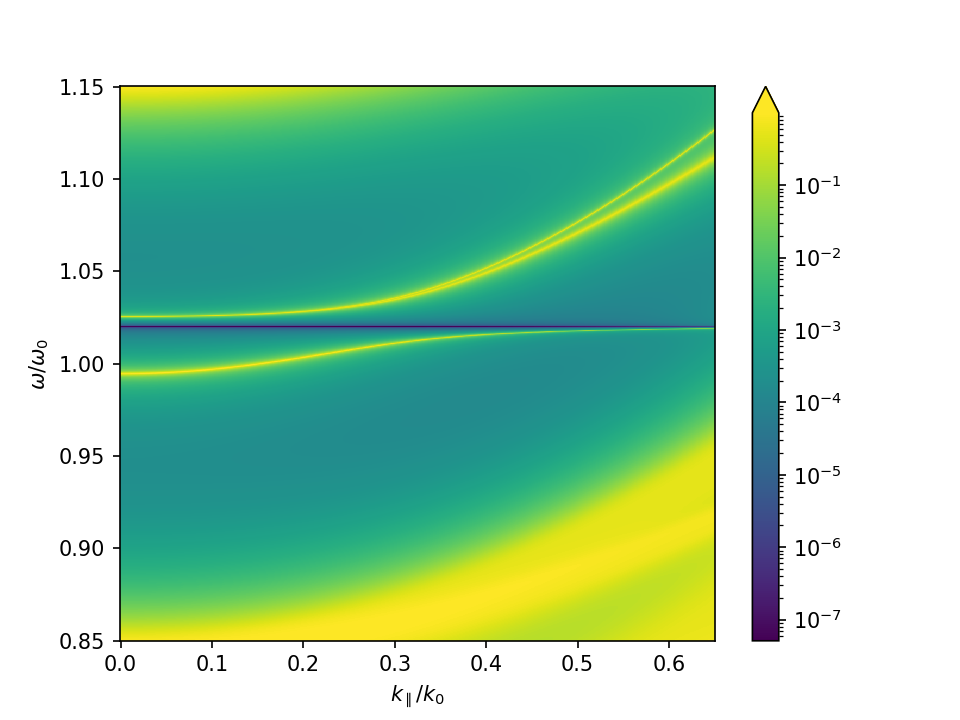

Text(0, 0.5, '$\\omega/\\omega_0$')

In [994]:
plt.figure()

import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
Z = (T_tr_TE+T_tr_TM)/2
pcm = plt.pcolormesh(K_x.real*l_0/(2*np.pi) , W/(2*np.pi * hbarc/l_0) , Z , 
                     norm=colors.LogNorm(vmin=Z.min(), vmax=Z.max()), shading='auto')
plt.colorbar(pcm, extend='max')
plt.xlabel(r'$k_{\parallel}/k_0$')
plt.ylabel(r'$\omega/\omega_0$')
#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))

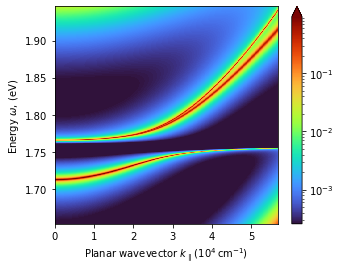

In [30]:
plt.figure(figsize=(5,4))

import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
Z = (T_tr_TE+T_tr_TM)/2
pcm = plt.pcolormesh(K_x.real*1e3 , W , Z , 
                     norm=colors.LogNorm(vmin=Z.min()*5000, vmax=Z.max()),
                     cmap='turbo', shading='auto')
plt.colorbar(pcm, extend='max')
plt.xlabel(r'Planar wavevector $k_{\parallel}\,(10^4\,$' + 'cm'+r'$^{-1}$)')
plt.ylabel(r'Energy $\omega, \,$(eV)')
#plt.title(r'$\Gamma_0 \approx 6 10^{-4}\omega \approx 1{ meV}$')
plt.savefig('test.pdf', dpi=1000, bbox_inches='tight')
#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))

<IPython.core.display.Javascript object>


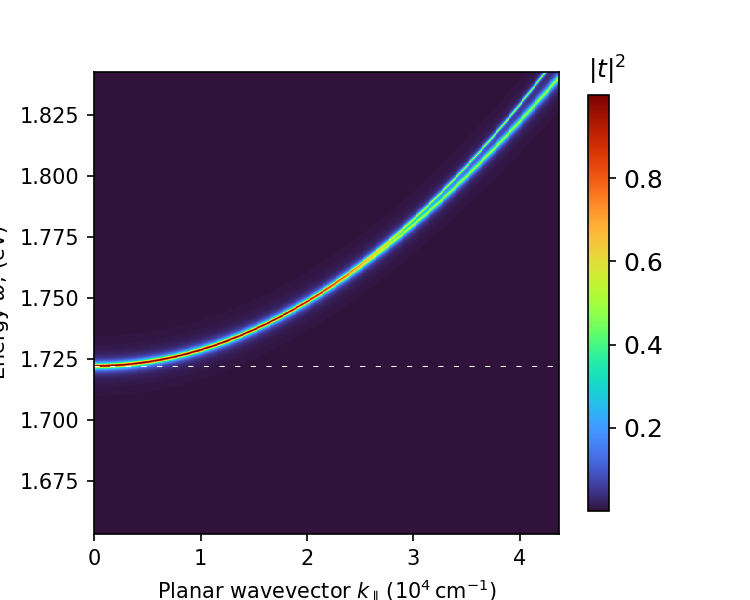

In [236]:
plt.figure(figsize=(5,4))

import matplotlib.colors as colors


#Test_TM=T_tr_TM
#Test_TM[Test_TM<0.1] = np.nan
Z = (T_tr_TE+T_tr_TM)/2
pcm = plt.pcolormesh(K_x.real*1e3 , W , Z ,
                     cmap='turbo', shading='auto')

clb = plt.colorbar(pcm, shrink=0.9, ticks=[0, 0.2, 0.4, 0.6, 0.8, 1])
clb.ax.set_yticklabels(['0', '0.2', '0.4','0.6','0.8','1'])
clb.ax.tick_params(labelsize=12) 
clb.ax.set_title('$|t|^2$',fontsize=12, loc='left',pad=8)

plt.xlabel(r'Planar wavevector $k_{\parallel}\,(10^4\,$' + 'cm'+r'$^{-1}$)')
plt.ylabel(r'Energy $\omega, \,$(eV)')
#plt.hlines(w_0_ex, K_x.real[0,0]*1e3, K_x.real[0,-1]*1e3, linestyles=((0, (5, 10))), lw=0.5, colors='w')
plt.hlines(2*np.pi/l_0*hbarc, 0, K_x.real[0,-1]*1e3, linestyles=((0, (5, 10))), lw=0.5, colors='w')

#plt.plot(K_x.real[0,:]*1e3, hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x.real[0,:]**2))
#plt.title(r'$\Gamma_0 \approx 6 10^{-4}\omega \approx 1{ meV}$')
plt.savefig('Dispersion_ph.png', dpi=1000, bbox_inches='tight')
#plt.plot(K_x[0,:], hbarc*np.sqrt((2*np.pi/l_0)**2 + K_x[0,:]**2))

In [213]:
G

0.020120768175536652